In [1]:
import yfinance as yf
import pandas as pd

In [2]:
df = yf.download('TATASTEEL.NS')

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,111.728554,112.149643,110.353004,111.868919,59.070183,1024222
1996-01-02,111.728554,112.149643,109.510826,109.791557,57.973278,1695431
1996-01-03,109.791557,112.290009,109.510826,109.819626,57.988106,1351411
1996-01-04,108.079132,108.079132,103.868256,106.338638,56.150024,3478582
1996-01-05,105.047302,105.552605,103.166443,104.233200,55.038288,3013803


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-05-11,1190.000000,1246.000000,1176.900024,1233.900024,1233.900024,41108381
2021-05-12,1231.949951,1246.849976,1163.250000,1179.150024,1179.150024,30889192
2021-05-14,1185.000000,1185.000000,1115.199951,1132.099976,1132.099976,37648032
2021-05-17,1138.000000,1158.199951,1103.500000,1150.849976,1150.849976,28753430
2021-05-18,1175.000000,1196.449951,1157.050049,1180.000000,1180.000000,24571703


In [5]:
import numpy as np
import math 
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [6]:
df.shape

(6370, 6)

## Historical Data Graph

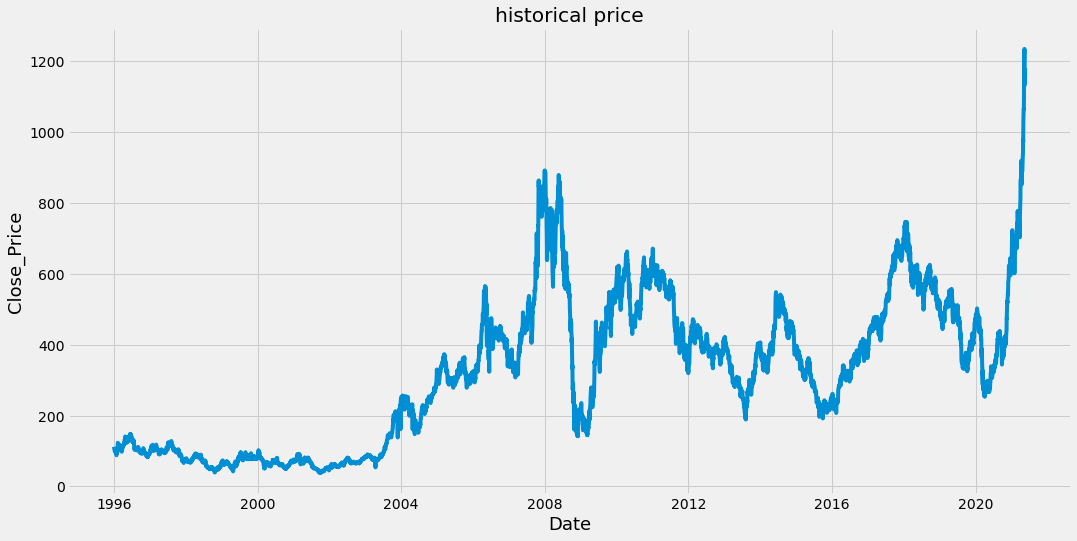

In [7]:
plt.figure(figsize=(16,8))
plt.title('historical price')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close_Price', fontsize=18)
plt.show()

In [8]:
df = df['Close']

In [9]:
df = np.array(df).reshape(-1,1)
print(df)

[[ 111.86891937]
 [ 109.79155731]
 [ 109.81962585]
 ...
 [1132.09997559]
 [1150.84997559]
 [1180.        ]]


## Scaled Data

In [10]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_df = scaler.fit_transform(np.array(df).reshape(-1,1))

training_size=int(len(scaled_df)*0.8)
test_size=len(scaled_df)-training_size
train_data =scaled_df[0:training_size,:]
test_data = scaled_df[training_size:len(scaled_df),:1]
training_size,test_size

## Train-Test-Split

In [11]:
scaled_df
training_data_len = math.ceil(len(scaled_df)*0.8)
training_data_len

5096

In [12]:
train_data = scaled_df[0:training_data_len , :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.06195867, 0.06022196, 0.06024542, 0.05733524, 0.05557505,
       0.05231284, 0.05191386, 0.05146794, 0.05341589, 0.05308732,
       0.05238324, 0.05221896, 0.04937919, 0.04766594, 0.04698533,
       0.04780675, 0.04466188, 0.04362924, 0.04200986, 0.04200986,
       0.04536595, 0.04602309, 0.04679758, 0.04855777, 0.05440159,
       0.05775769, 0.05020061, 0.05341589, 0.06576068, 0.07144023,
       0.06564334, 0.06569027, 0.06843617, 0.06705149, 0.0649862 ,
       0.06557293, 0.06184133, 0.06184133, 0.06604231, 0.06519743,
       0.06578416, 0.06421172, 0.06515049, 0.05902502, 0.06005767,
       0.05958829, 0.05958829, 0.06127807, 0.06059746, 0.06015155,
       0.05839136, 0.05714749, 0.06066787, 0.0597291 , 0.05780463,
       0.05411997, 0.05041183, 0.05041183, 0.05550464, 0.05411997])]
[0.056678104143510794]



In [13]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [14]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [15]:
x_train.shape

(5036, 60, 1)

## Build LSTM

In [16]:
model = Sequential()
model.add(LSTM(50,return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50,return_sequences = False))   
model.add(Dense(25))
model.add(Dense(1))

In [17]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

3403/5036 [===================>..........] - ETA: 34s - loss: 0.0011

In [ ]:
test_data = scaled_df[training_data_len - 60: , :]
x_test = []
y_test = df[training_data_len: , :]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

pre

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
# predictions = np.array(predictions)
# predictions
# pred = predictions.flatten()
# pred = pred.astype('int')

In [ ]:
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

## Plotting test-data vs prediction by model

train = df[:5103]
val = df[5103:]
val['predictions'] = predictions

plt.figure(figsize=(16, 8))
plt.title('model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close_Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(original[['Close','predictions']])
plt.legend(['train', 'val', 'predictions'], loc = 'lower right')
plt.plot(train, val)
plt.show()

In [ ]:
test = df[training_data_len:]
plt.figure(figsize=(16,8))
plt.title('historical price')
plt.plot(test)
plt.plot(predictions)
# plt.plot('Close')
plt.xlabel('Days', fontsize=18)
plt.ylabel('Close_Price', fontsize=18)
plt.legend(['test', 'predictions'], loc = 'lower right')
plt.show()

In [ ]:
some_data = y_test[5:]

In [ ]:
some_labels = predictions[5:]

In [ ]:
some_data, some_labels